Epoch 100, Generator Loss: 0.8456742167472839, Discriminator Loss: 1.3444364070892334
Epoch 200, Generator Loss: 0.7935433387756348, Discriminator Loss: 1.3426084518432617
Epoch 300, Generator Loss: 0.7436311841011047, Discriminator Loss: 1.41904878616333
Epoch 400, Generator Loss: 0.5988756418228149, Discriminator Loss: 1.3583521842956543
Epoch 500, Generator Loss: 0.6697489023208618, Discriminator Loss: 1.3700422048568726
Epoch 600, Generator Loss: 0.5549043416976929, Discriminator Loss: 1.6634442806243896
Epoch 700, Generator Loss: 0.7929589748382568, Discriminator Loss: 1.3967331647872925
Epoch 800, Generator Loss: 0.6877675652503967, Discriminator Loss: 1.3561058044433594
Epoch 900, Generator Loss: 0.6946747899055481, Discriminator Loss: 1.4556334018707275
Epoch 1000, Generator Loss: 0.6258535385131836, Discriminator Loss: 1.4035221338272095
Epoch 1100, Generator Loss: 0.7095252871513367, Discriminator Loss: 1.3512194156646729
Epoch 1200, Generator Loss: 0.6411925554275513, Discri

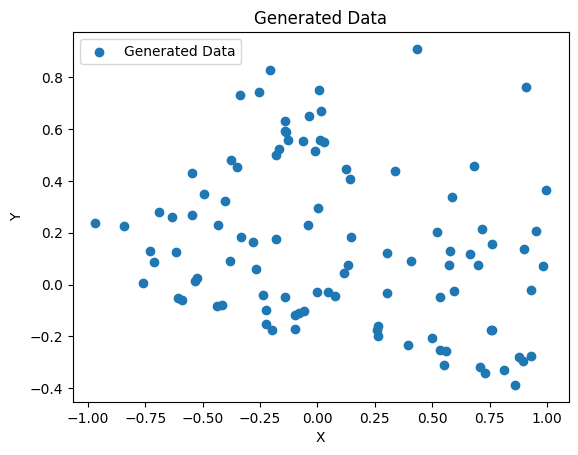

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Generate random data points
num_points = 100
latent_dim = 2

# Discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Dense(64, input_shape=(2,), activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(32, input_shape=(latent_dim,), activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(2, activation='tanh')
    ])
    return model

# Create generator and discriminator models
generator = build_generator()
discriminator = build_discriminator()

# Define optimizers
generator_optimizer = tf.keras.optimizers.Adam(0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(0.001)

# Define loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Training loop
EPOCHS = 5000
BATCH_SIZE = 32

for epoch in range(EPOCHS):
    # Train discriminator
    noise = tf.random.normal([BATCH_SIZE, latent_dim])
    generated_data = generator(noise, training=True)
    real_data = np.random.uniform(-1, 1, (BATCH_SIZE, 2))
    
    with tf.GradientTape() as disc_tape:
        disc_real_output = discriminator(real_data, training=True)
        disc_fake_output = discriminator(generated_data, training=True)
        disc_loss = cross_entropy(tf.ones_like(disc_real_output), disc_real_output) + \
                    cross_entropy(tf.zeros_like(disc_fake_output), disc_fake_output)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Train generator
    noise = tf.random.normal([BATCH_SIZE, latent_dim])
    with tf.GradientTape() as gen_tape:
        generated_data = generator(noise, training=True)
        disc_fake_output = discriminator(generated_data, training=True)
        gen_loss = cross_entropy(tf.ones_like(disc_fake_output), disc_fake_output)
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    # Print losses every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}")

# Generate and plot generated data
noise = tf.random.normal([num_points, latent_dim])
generated_data = generator(noise, training=False).numpy()

plt.scatter(generated_data[:, 0], generated_data[:, 1], label='Generated Data')
plt.title('Generated Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
